## **Trabajo práctico 2 - Matemática III**


---

**Docentes:**    

*   HENCEK, Mónica
*   SALAMIDA, Diego Hernán


**Alumna:**
*   SALAZAR GALLARDO, Ximena

En este caso cree una red neuronal que trata de analizar y determinar el valor de billetes argentinos.

**Aclaración:** Las imagenes de entrenamiento son las de la carpeta pesos, mientras que las de predicción, billetes_prueba

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Parámetros
# Decidí poner 35 Epochs porque el dateset de imagenes es poco, si le agregaba mas Epochs el programa comenzaba a fallar y disminuir su calidad de predicción
IMG_HEIGHT = 45
IMG_WIDTH = 80
BATCH_SIZE = 8
EPOCHS = 35

pesos_datasets_path = r"/content/drive/MyDrive/pesos"

# Preprocesamiento y carga de imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    vertical_flip=False
)
train_generator = train_datagen.flow_from_directory(
    pesos_datasets_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    pesos_datasets_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Defino la CNN
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
)

Found 51 images belonging to 7 classes.
Found 8 images belonging to 7 classes.
Epoch 1/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.2128 - loss: 2.1119 - val_accuracy: 0.1250 - val_loss: 1.9210
Epoch 2/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1432 - loss: 1.9712 - val_accuracy: 0.1250 - val_loss: 1.9301
Epoch 3/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3597 - loss: 1.8316 - val_accuracy: 0.2500 - val_loss: 1.8712
Epoch 4/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.2343 - loss: 1.7904 - val_accuracy: 0.1250 - val_loss: 1.8222
Epoch 5/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4040 - loss: 1.7844 - val_accuracy: 0.6250 - val_loss: 1.7537
Epoch 6/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4275 - loss: 1.6942 - val_accuracy: 0.6250 - val_loss: 1.6554
Epoch 7/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5455 - loss: 1.5270 - val_accuracy: 0.6250 - val_loss: 1.5717
Epoch 8/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/s

In [22]:
test_loss, test_acc = model.evaluate(val_generator)
print('Precisión en el conjunto de prueba:', f'{test_acc*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8750 - loss: 0.5759
Precisión en el conjunto de prueba: 87.50%


Con  estos datos puedo afirmar que la precisión del modelo es del 87.5%, algo bastante decente.

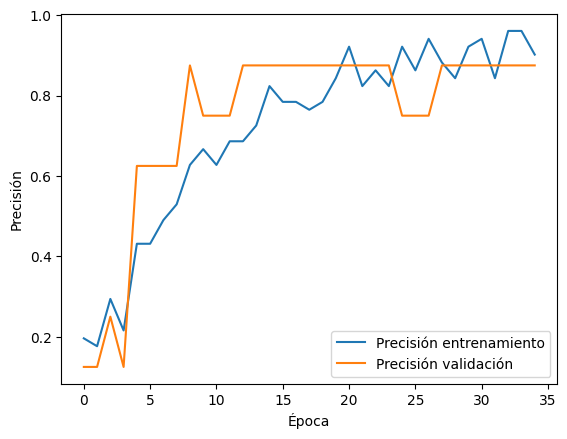

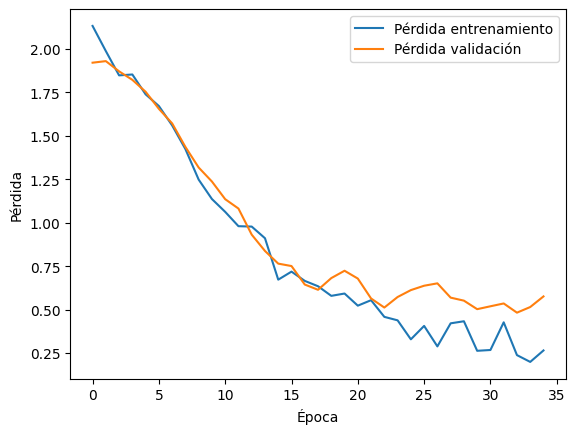

In [23]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Con estos gráficos me doy cuenta de la historia del modelo, cómo evoluciona al ser entrenado, cómo se ve. La precisión fue en aumento, mientras que la pérdida fue en descenso. Podría considerarlo un éxito.

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Carpeta con imágenes nuevas
folder_path = "/content/drive/MyDrive/billetes_prueba"
imagenes = []
nombres = []

for fname in os.listdir(folder_path):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, fname)
        img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = image.img_to_array(img) / 255.0
        imagenes.append(img_array)
        nombres.append(fname)

imagenes = np.array(imagenes)
preds = model.predict(imagenes)
clases = list(train_generator.class_indices.keys())

for i, pred in enumerate(preds):
    clase_predicha = np.argmax(pred)
    print(f"{nombres[i]}: {clases[clase_predicha]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
billete1.png: 10000 Pesos
billete3.png: 10 Pesos
billete2.png: 10 Pesos
billete5.png: 10000 Pesos
billete6.png: 10000 Pesos
billete7.png: 10000 Pesos
billete8.png: 20000 Pesos
billete4.png: 10000 Pesos


Ahora con esto, intenté predecir qué billetes eran en las imágenes. Aunque acertó la mayoría, me llamó la atención que los errores fueron principalmente con los billetes de 2000 pesos, que terminó confundiendo con otros. Me parece que el problema es que no conseguí buenas imágenes del billete de 2000. De todas formas, el modelo quedó bastante preciso.

##Creditos a IA
ChatGPT